# Macau/PLP trocas comerciais

A partir dos dados da base comtrade das Nações Unidas

## Inicialização

Ver [aqui](0-comtrade-setup-first.ipynb) para instruções como obter chave de acesso APIKEY.
A APIKEY que dá acesso a mais de 500 linhas de
resultados.


In [42]:
import comtradetools as comtradetools

comtradetools.setup()
APIKEY = comtradetools.get_api_key()
comtradetools.init(APIKEY, force_init=True)

INFO:root:Downloading codebook from https://raw.githubusercontent.com/joaquimrcarvalho/cipf-comtrade/main/support/codebook.xlsx
INFO:root:Downloading country groups from https://unctadstat.unctad.org/EN/Classifications/Dim_Countries_Hierarchy_UnctadStat_All_Flat.csv


un-comtrade codebook downloaded to support/codebook.xlsx
un-comtrade country groups downloaded to support/Dim_Countries_Hierarchy_UnctadStat_All_Flat.csv


INFO:root:Loading HS codes from support/harmonized-system.csv


## Parâmetros gerais que não mudam



In [43]:
from comtradetools import COUNTRY_CODES_REVERSE as m49

In [44]:
from comtradetools import encode_country 

angola = encode_country('Angola')
brazil = encode_country('Brazil')
cabo_verde = encode_country('Cabo Verde')
china = encode_country('China')
hong_kong = encode_country('China, Hong Kong SAR')
macau = encode_country('China, Macao SAR')
taiwan = encode_country('Taiwan, Province of China')
guine_equatorial = encode_country('Equatorial Guinea')
guine_bissau = encode_country('Guinea-Bissau')
mozambique = encode_country('Mozambique')
portugal = encode_country('Portugal')
stome_principe = encode_country('Sao Tome and Principe')
timor = encode_country('Timor-Leste')

# make list of Portuguese Speaking Countries
plp = [angola, brazil, cabo_verde, guine_bissau,
       guine_equatorial, mozambique, portugal,
       stome_principe, timor]
plp_list = ",".join(map(str, plp))



In [45]:
macau,hong_kong,taiwan

(446, 344, 158)

## Parâmetros para visualização

Definir as colunas a visualizar, ordem das linhas abaixo para simplificar
posterior visualização dos dados.

### Descrição das colunas 

In [46]:
import comtradetools as comtrade

print(comtrade.DATA_ITEM_DF.to_markdown())


|    | dataItem                 | description                                                                              | isInDataAPICommodity   | isInDataAPIServices   | isInBulkFileFinal   | isInBulkFileTariffline   |
|---:|:-------------------------|:-----------------------------------------------------------------------------------------|:-----------------------|:----------------------|:--------------------|:-------------------------|
|  0 | datasetCode              | Combination of several keys to identify specific datasetCode                             | True                   | True                  | True                | True                     |
|  1 | typeCode                 | Product type: Goods or Services                                                          | True                   | True                  | True                | True                     |
|  2 | freqCode                 | The time interval at which observations occur                             

Lista de colunas

In [47]:
import comtradetools as comtrade

cols_all = comtrade.DATA_ITEM_DF.dataItem.unique()
cols_all

array(['datasetCode', 'typeCode', 'freqCode', 'refPeriodId', 'refYear',
       'refMonth', 'period', 'reporterCode', 'reporterISO',
       'reporterDesc', 'flowCategory', 'flowCode', 'flowDesc',
       'partnerCode', 'partnerISO', 'partnerDesc', 'partner2Code',
       'partner2ISO', 'partner2Desc', 'classificationSearchCode',
       'classificationCode', 'isOriginalClassification', 'cmdCode',
       'cmdDesc', 'aggrLevel', 'isLeaf', 'customsCode', 'customsDesc',
       'mosCode', 'mosDesc', 'motCode', 'motDesc', 'qtyUnitCode',
       'qtyUnitAbbr', 'qty', 'isQtyEstimated', 'altQtyUnitCode',
       'altQtyUnitAbbr', 'altQty', 'isAltQtyEstimated', 'netWgt',
       'isnetWgtEstimated', 'grossWgt', 'isgrossWgtEstimated', 'cifValue',
       'fobValue', 'primaryValue', 'legacyEstimationFlag', 'isReported',
       'isAggregate'], dtype=object)

## Cobertura dos dados: importações/exportações Macau-PLP anos disponíveis

Tendo a China como "reporter".

In [48]:
import time
import comtradetools
import pandas as pd

comtradetools.init(APIKEY)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

flow = "M,X"

year_start = 2003
year_end = 2023
years_of_interest = comtradetools.year_range(year_start, year_end)

periods = comtradetools.split_period(years_of_interest,12)
df = pd.DataFrame()
for period in periods:

    temp = comtradetools.getFinalData(APIKEY,
                        typeCode="C",# C for commodities, S for Services
                        freqCode="A",# (freqCode) A for annual and M for monthly
                        clCode="HS",
                        cmdCode="TOTAL",
                        flowCode=flow,
                        reporterCode=macau,
                        partnerCode=plp_list,
                        partner2Code=None,
                        customsCode=None,
                        motCode=None,
                        period=period,
                        includeDesc=True
        )
    df = pd.concat([df,temp])


INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
INFO:root:Using cached results for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
INFO:root:Calling getFinalData for period 2015,2016,2017,2018,2019,2020,2021,2022,2023
INFO:root:Using cached results for period 2015,2016,2017,2018,2019,2020,2021,2022,2023


In [49]:
from comtradetools import get_year_intervals
for country in df.partnerDesc.unique():
    years = sorted(df[df.partnerDesc == country]['refYear'].unique())
    print(country, get_year_intervals(years)),

Angola ['2004-2004', '2007-2012', '2017-2017', '2021-2022']
Brazil ['2003-2022']
Cabo Verde ['2007-2008']
Mozambique ['2006-2007', '2010-2011', '2013-2015', '2017-2022']
Portugal ['2003-2022']
Guinea-Bissau ['2014-2014', '2020-2022']
Timor-Leste ['2004-2013', '2018-2018', '2020-2020', '2022-2022']
Sao Tome and Principe ['2022-2022']


## Directoria para relatórios e gráficos

In [50]:
from pathlib import Path

report_dir = 'reports'
Path(report_dir).mkdir(parents=True, exist_ok=True)

## Macau e PLP: importações, exportações, volume, saldos

O Forum Macau inclui desde 2016 um quadro sumário
dos dados das trocas comerciais entre a China e 
os PLP. Ver https://www.forumchinaplp.org.mo/pt/publications-data-4/annual-reports/

Aqui fazemos o mesmo para Macau

>NOTA: Tal como nos quadros do Forum os valores são
apresentados em 10 mil USD

In [51]:
import comtradetools as comtrade
import pandas as pd

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f} $10mil'.format

flow = "M,X"
partnerCode = comtrade.m49_plp_list
periods = comtrade.split_period(years_of_interest,12)
df = pd.DataFrame()
for period in periods:
    print(f"Fetching data for period {period}")

    temp = comtrade.getFinalData(APIKEY,
                                typeCode="C",# C for commodities, S for Services
                                freqCode="A",# (freqCode) A for annual and M for monthly
                                    flowCode=flow,
                                    reporterCode=comtrade.m49_macau,
                                    partnerCode=partnerCode,
                                    cmdCode='TOTAL',
                                    period=period,
                                    partner2Code=0,
                                    clCode="HS",
                                    customsCode='C00',
                                    motCode='0',
                                    includeDesc=True
                         )
    df = pd.concat([df,temp])


INFO:root:Calling getFinalData for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
INFO:root:Using cached results for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
INFO:root:Calling getFinalData for period 2015,2016,2017,2018,2019,2020,2021,2022,2023
INFO:root:Using cached results for period 2015,2016,2017,2018,2019,2020,2021,2022,2023


Fetching data for period 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Fetching data for period 2015,2016,2017,2018,2019,2020,2021,2022,2023


In [52]:

temp=df.pivot(index=['refYear','partnerDesc',],columns='flowCode',values='primaryValue')
temp['C'] = temp['M'] + temp['X']
temp['S'] = temp['X']-temp['M']
forum_type = temp[['C','X','M','S']]
forum_type.columns=['Trocas','Exportações','Importações','Saldo']
forum_type.div(10000).fillna("-")


Trocas   Exportações     Importações  \
refYear partnerDesc                                                           
2003    Brazil                  481.04 $10mil   7.38 $10mil   473.67 $10mil   
        Portugal              1,553.38 $10mil 400.11 $10mil 1,153.27 $10mil   
2004    Angola                              -  58.03 $10mil               -   
        Brazil                1,157.54 $10mil   2.66 $10mil 1,154.88 $10mil   
        Portugal              1,722.32 $10mil 269.26 $10mil 1,453.05 $10mil   
        Timor-Leste                         -   0.25 $10mil               -   
2005    Brazil                  719.22 $10mil  32.09 $10mil   687.14 $10mil   
        Portugal              1,454.19 $10mil 141.14 $10mil 1,313.05 $10mil   
        Timor-Leste                         -             -     3.84 $10mil   
2006    Brazil                1,055.06 $10mil 270.94 $10mil   784.12 $10mil   
        Mozambique                0.13 $10mil   0.05 $10mil     0.09 $10mil   
        Portugal              1,769.71 $10mil  88.16 $10mil 1,681.55 $10mil   
        Timor-Leste                         -             -     7.93 $10mil   
2007    Angola                              -   0.14 $10mil               -   
        Brazil                1,314.10 $10mil  34.79 $10mil 1,279.31 $10mil   
        Cabo Verde                          -             -     0.01 $10mil   
        Mozambique                          -             -    30.97 $10mil   
        Portugal              1,911.01 $10mil  27.36 $10mil 1,883.65 $10mil   
        Timor-Leste                         -             -    31.03 $10mil   
2008    Angola                              -             -     2.19 $10mil   
        Brazil                2,001.49 $10mil 100.46 $10mil 1,901.03 $10mil   
        Cabo Verde                          -             -     0.19 $10mil   
        Portugal              2,178.13 $10mil   5.29 $10mil 2,172.84 $10mil   
        Timor-Leste                         -             -    18.13 $10mil   
2009    Angola                              -             -     2.89 $10mil   
        Brazil                2,410.33 $10mil   5.60 $10mil 2,404.73 $10mil   
        Portugal              1,732.99 $10mil   3.59 $10mil 1,729.40 $10mil   
        Timor-Leste               0.17 $10mil   0.15 $10mil     0.01 $10mil   
2010    Angola                    4.55 $10mil   4.42 $10mil     0.13 $10mil   
        Brazil                2,361.18 $10mil   3.29 $10mil 2,357.89 $10mil   
        Mozambique                          -             -    24.75 $10mil   
        Portugal              1,687.87 $10mil   4.78 $10mil 1,683.10 $10mil   
        Timor-Leste              12.23 $10mil   1.16 $10mil    11.07 $10mil   
2011    Angola                              -  17.38 $10mil               -   
        Brazil                2,864.85 $10mil  15.84 $10mil 2,849.01 $10mil   
        Mozambique                          -             -    56.65 $10mil   
        Portugal              2,356.01 $10mil  12.93 $10mil 2,343.08 $10mil   
        Timor-Leste                         -             -     0.38 $10mil   
2012    Angola                   56.19 $10mil  17.37 $10mil    38.83 $10mil   
        Brazil                3,566.91 $10mil   3.17 $10mil 3,563.74 $10mil   
        Portugal              2,999.58 $10mil  17.00 $10mil 2,982.58 $10mil   
        Timor-Leste                         -             -    10.41 $10mil   
2013    Brazil                3,057.05 $10mil   1.10 $10mil 3,055.95 $10mil   
        Mozambique                          -             -     0.11 $10mil   
        Portugal              2,613.88 $10mil   1.00 $10mil 2,612.88 $10mil   
        Timor-Leste                         -             -     1.43 $10mil   
2014    Brazil                4,178.88 $10mil   3.65 $10mil 4,175.24 $10mil   
        Guinea-Bissau                       -   3.38 $10mil               -   
        Mozambique                          -             -     0.66 $10mil   
        Po

### Gravar em Excel

- [ ] formatar em Excel largura das colunas e formato dos números. Ver cn_plp_commodities.ipynb

In [53]:
real_period = forum_type.index.get_level_values('refYear')
start_year=min(real_period)
end_year=max(real_period)
period=f"{start_year}-{end_year}"
forum_type.reset_index().to_excel(f"./reports/mo_plp_trocas_{period}.xlsx", index=False)


## Gráficos dos valores das importações e exportações, trocas e saldos

### Gráficos das trocas comerciais (importações + exportações)

In [58]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Trocas' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento     Trocas                                                    \
Parceiro      Angola        Brazil Cabo Verde Guinea-Bissau Mozambique   
refYear                                                                  
2003             NaN  4,810,446.34        NaN           NaN        NaN   
2004             NaN 11,575,374.41        NaN           NaN        NaN   
2005             NaN  7,192,225.23        NaN           NaN        NaN   
2006             NaN 10,550,551.01        NaN           NaN   1,328.39   
2007             NaN 13,140,986.42        NaN           NaN        NaN   
2008             NaN 20,014,890.96        NaN           NaN        NaN   
2009             NaN 24,103,315.36        NaN           NaN        NaN   
2010       45,528.36 23,611,824.41        NaN           NaN        NaN   
2011             NaN 28,648,506.11        NaN           NaN        NaN   
2012      561,928.48 35,669,077.13        NaN           NaN        NaN   
2013             NaN 30,570,494.30        NaN           NaN        NaN   
2014             NaN 41,788,824.22        NaN           NaN        NaN   
2015             NaN    195,161.00        NaN           NaN        NaN   
2016             NaN           NaN        NaN           NaN        NaN   
2017             NaN           NaN        NaN           NaN        NaN   
2018             NaN           NaN        NaN           NaN 207,217.57   
2019             NaN           NaN        NaN           NaN  29,348.10   
2020             NaN 60,231,026.41        NaN           NaN        NaN   
2021             NaN 55,816,131.02        NaN           NaN  16,176.69   
2022             NaN 96,449,828.60        NaN           NaN        NaN   

Movimento                                                  
Parceiro       Portugal Sao Tome and Principe Timor-Leste  
refYear                                                    
2003      15,533,808.02                   NaN         NaN  
2004      17,223,166.63                   NaN         NaN  
2005      14,541,909.68                   NaN         NaN  
2006      17,697,120.85                   NaN         NaN  
2007      19,110,077.04                   NaN         NaN  
2008      21,781,282.20                   NaN         NaN  
2009      17,329,888.92                   NaN    1,671.79  
2010      16,878,733.29                   NaN  122,295.92  
2011      23,560,130.37                   NaN         NaN  
2012      29,995,794.90                   NaN         NaN  
2013      26,138,840.14                   NaN         NaN  
2014      31,327,018.27                   NaN         NaN  
2015      12,829,986.00                   NaN         NaN  
2016      34,865,141.00                   NaN         NaN  
2017      33,399,243.88                   NaN         NaN  
2018      40,962,416.24                   NaN         NaN  
2019      42,423,621.48                   NaN         NaN  
2020      34,311,882.66                   NaN         NaN  
2021                NaN                   NaN         NaN  
2022      34,719,662.24                   NaN         NaN

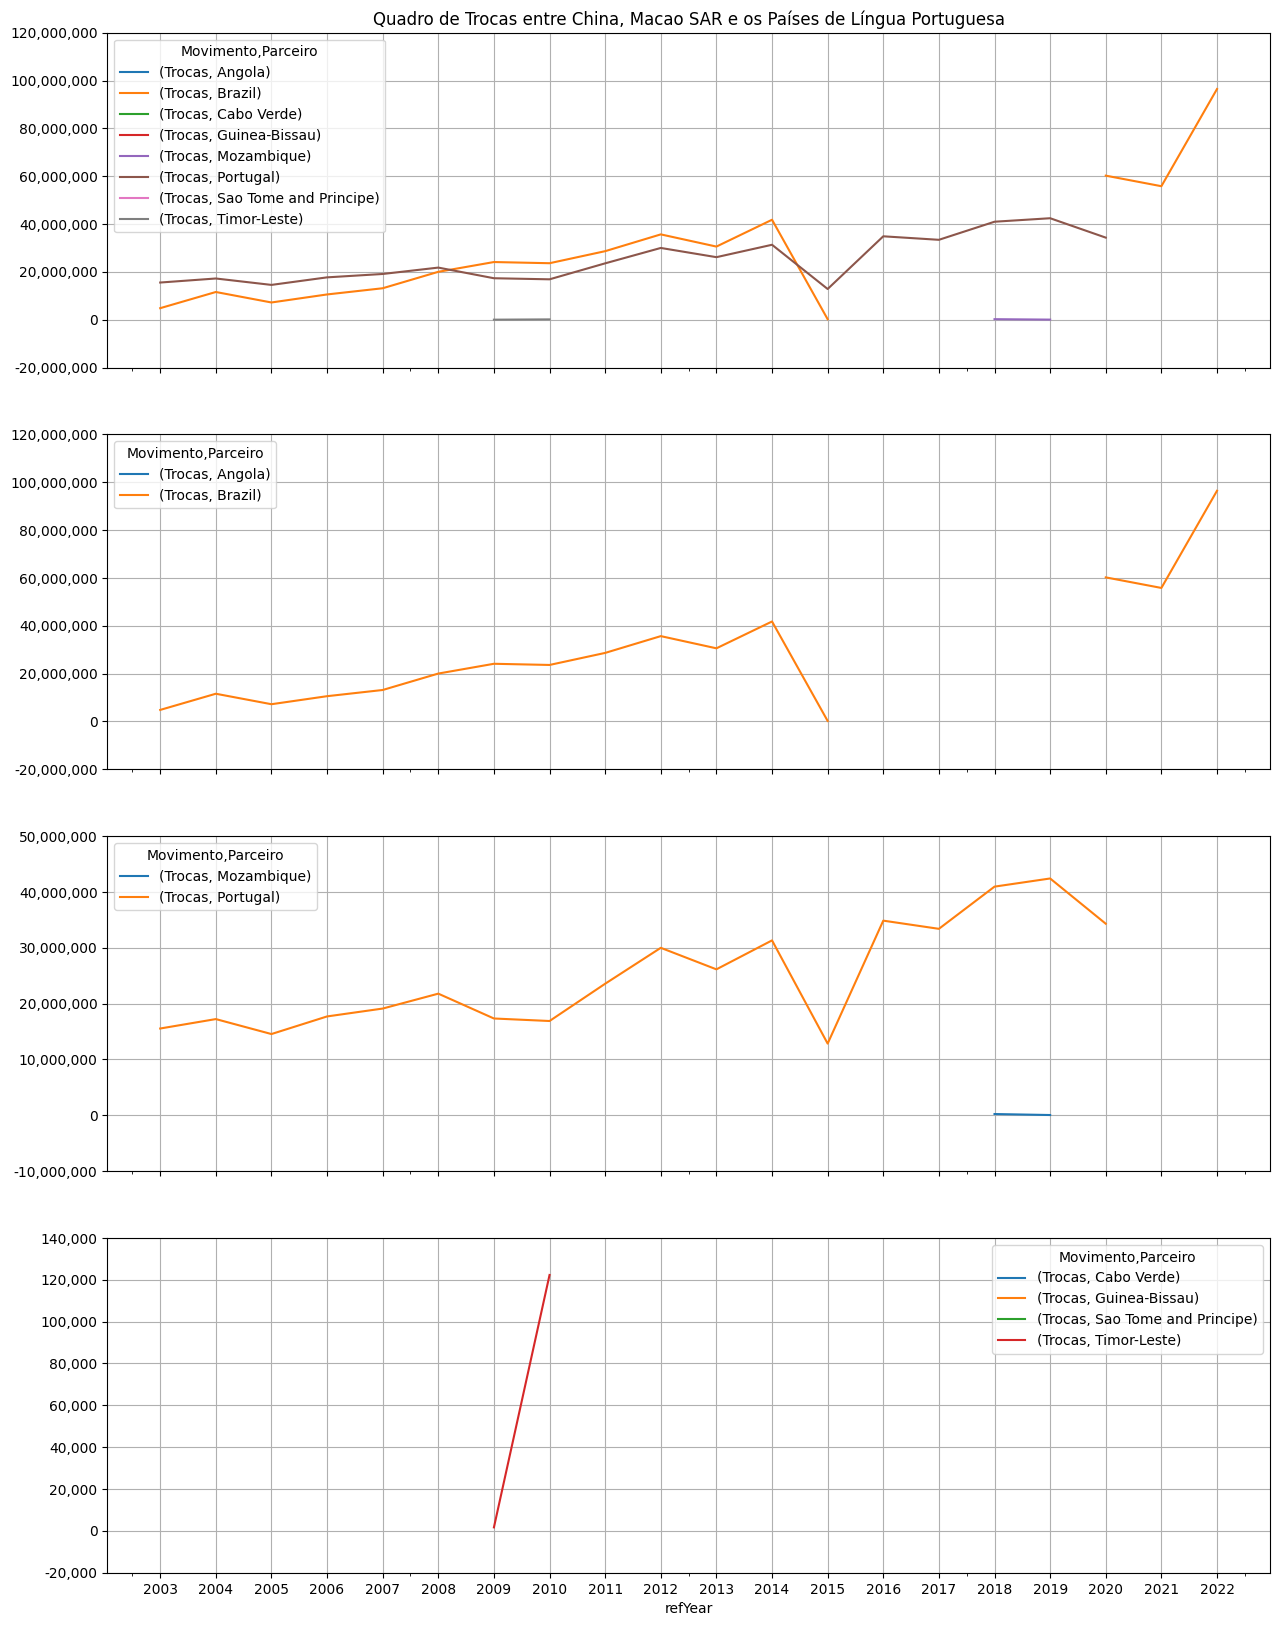

In [60]:
import matplotlib.pyplot as plt

title=f"Quadro de {movimento} entre {comtrade.COUNTRY_CODES[comtrade.m49_macau]} e os Países de Língua Portuguesa"

# Define the line styles
line_styles = ['-', '--', '-.', ':']

size=(15,20)
figure,axis = plt.subplots(4,sharex=True,figsize=size, squeeze=True)
graph_data.plot.line(ax=axis[0],xticks=graph_data.index.values,title=title)

detalhe_paises = ['Angola','Brazil']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[1],xticks=graph_data.index.values)

detalhe_paises = ['Mozambique','Portugal',]
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[2],xticks=graph_data.index.values)

detalhe_paises = ['Cabo Verde','Guinea-Bissau','Sao Tome and Principe','Timor-Leste']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[3],xticks=graph_data.index.values)

for ax in axis:
    current_values = ax.get_yticks()
    ax.set_yticks(current_values)
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    ax.grid()

plt.savefig(f"reports/mo_plp_{movimento}.png")

### Gráficos importações

In [61]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Importações' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento Importações                                                    \
Parceiro       Angola        Brazil Cabo Verde Guinea-Bissau Mozambique   
refYear                                                                   
2003              NaN  4,736,662.13        NaN           NaN        NaN   
2004              NaN 11,548,820.62        NaN           NaN        NaN   
2005              NaN  6,871,355.41        NaN           NaN        NaN   
2006              NaN  7,841,199.01        NaN           NaN     878.34   
2007              NaN 12,793,089.49      72.55           NaN 309,737.33   
2008        21,929.62 19,010,295.50   1,863.94           NaN        NaN   
2009        28,937.11 24,047,346.26        NaN           NaN        NaN   
2010         1,301.51 23,578,931.67        NaN           NaN 247,481.28   
2011              NaN 28,490,078.57        NaN           NaN 566,460.71   
2012       388,260.31 35,637,423.03        NaN           NaN        NaN   
2013              NaN 30,559,495.41        NaN           NaN   1,090.71   
2014              NaN 41,752,366.06        NaN           NaN   6,635.68   
2015              NaN    193,778.00        NaN           NaN   1,486.00   
2016              NaN 48,613,029.00        NaN           NaN        NaN   
2017              NaN 47,458,086.24        NaN           NaN        NaN   
2018              NaN 56,910,397.32        NaN           NaN 193,476.12   
2019              NaN 69,406,245.60        NaN           NaN  11,486.57   
2020              NaN 60,179,276.67        NaN           NaN   2,666.27   
2021        20,746.78 55,690,700.39        NaN     33,656.85  15,697.40   
2022       945,313.58 96,424,583.25        NaN      4,430.51 270,020.37   

Movimento                                                  
Parceiro       Portugal Sao Tome and Principe Timor-Leste  
refYear                                                    
2003      11,532,734.63                   NaN         NaN  
2004      14,530,525.69                   NaN         NaN  
2005      13,130,539.27                   NaN   38,351.71  
2006      16,815,503.39                   NaN   79,268.99  
2007      18,836,493.80                   NaN  310,265.72  
2008      21,728,421.33                   NaN  181,268.71  
2009      17,294,031.34                   NaN      125.25  
2010      16,830,970.55                   NaN  110,722.88  
2011      23,430,783.77                   NaN    3,807.58  
2012      29,825,814.28                   NaN  104,115.79  
2013      26,128,841.59                   NaN   14,286.94  
2014      31,037,649.72                   NaN         NaN  
2015      12,756,429.00                   NaN         NaN  
2016      34,860,870.00                   NaN         NaN  
2017      33,382,031.57                   NaN         NaN  
2018      40,904,756.86                   NaN         NaN  
2019      42,050,340.81                   NaN         NaN  
2020      34,261,218.03                   NaN  219,684.17  
2021      34,753,382.79                   NaN         NaN  
2022      34,706,647.32                734.02         NaN

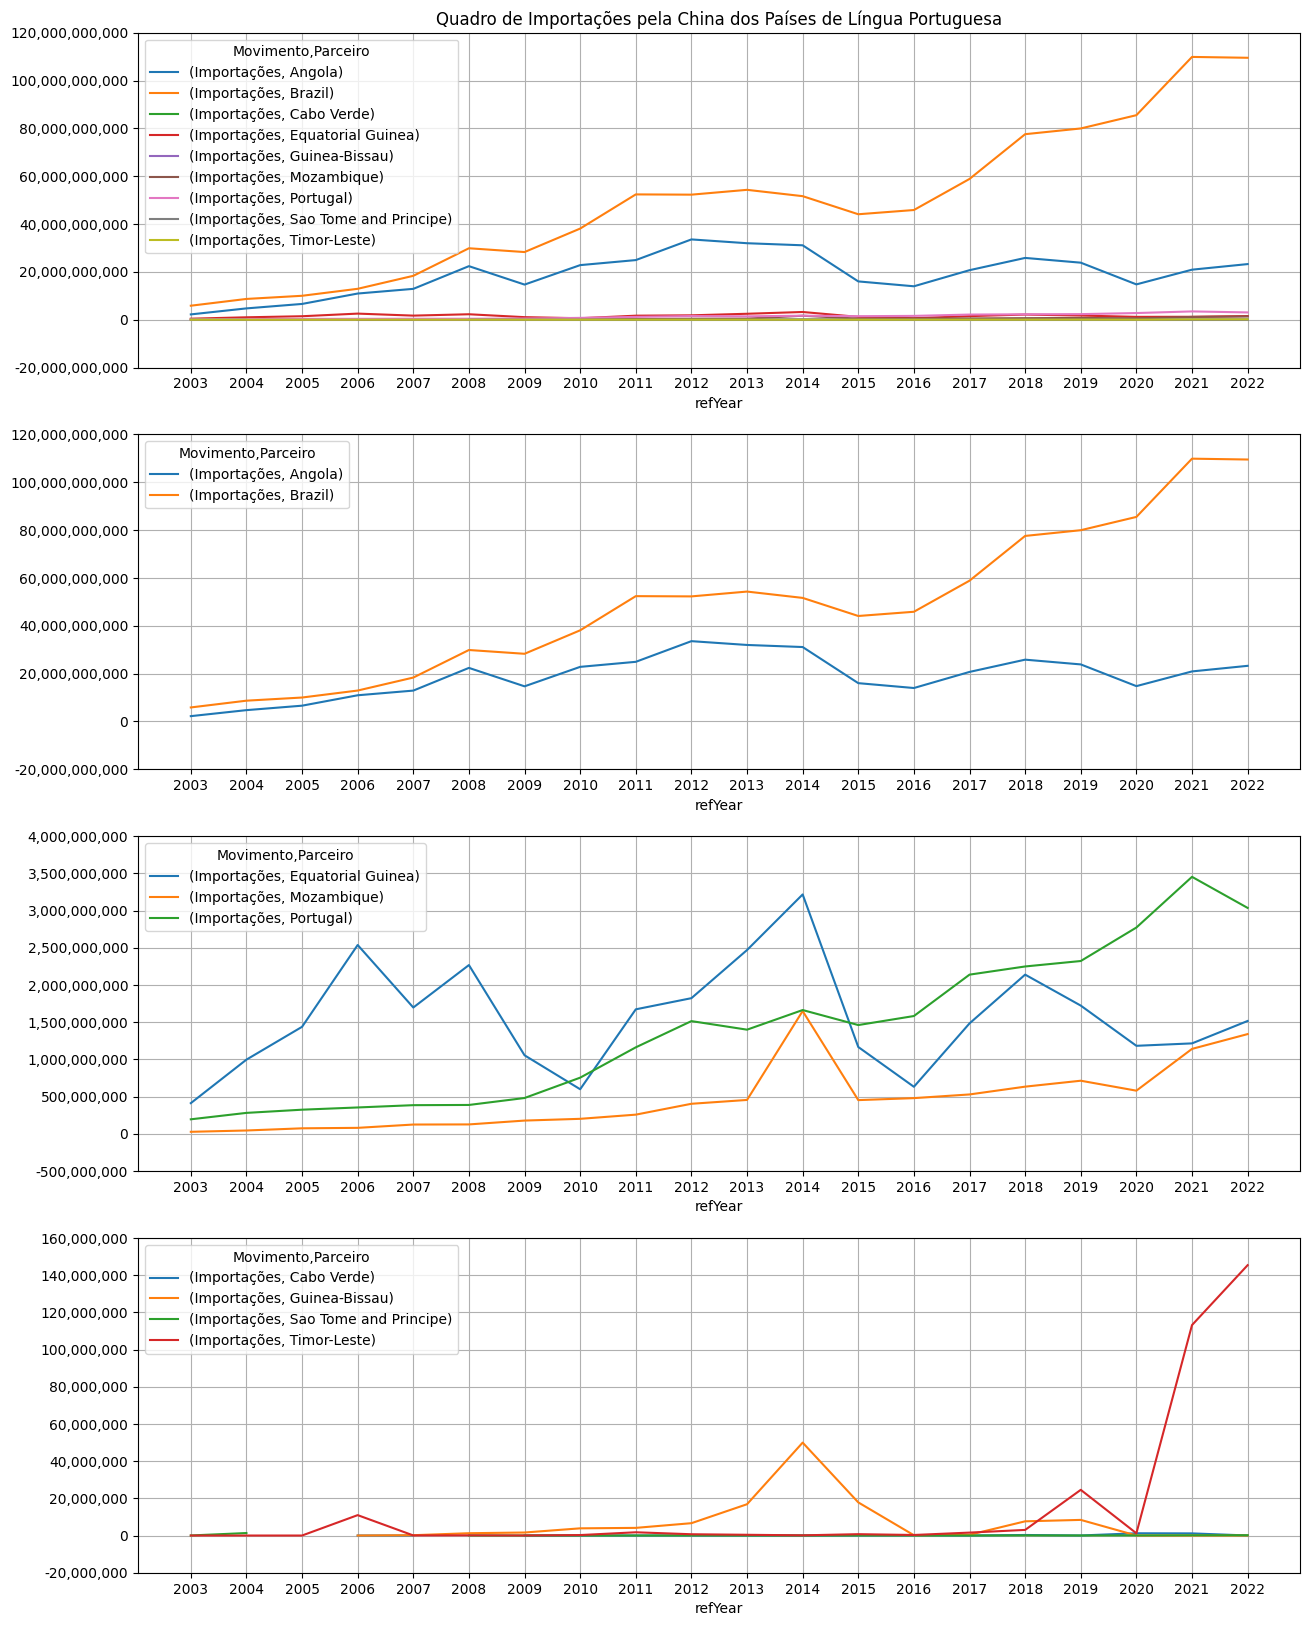

In [24]:
title=f"Quadro de {movimento} pela {comtrade.COUNTRY_CODES[comtrade.m49_macau]} dos Países de Língua Portuguesa"

size=(15,20)
figure,axis = plt.subplots(4,sharex=False,figsize=size, squeeze=True)
graph_data.plot.line(ax=axis[0],xticks=graph_data.index.values,title=title)

detalhe_paises = ['Angola','Brazil']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[1],xticks=graph_data.index.values)

detalhe_paises = ['Equatorial Guinea','Mozambique','Portugal',]
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[2],xticks=graph_data.index.values)

detalhe_paises = ['Cabo Verde','Guinea-Bissau','Sao Tome and Principe','Timor-Leste']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[3],xticks=graph_data.index.values)

for ax in axis:
    current_values = ax.get_yticks()
    ax.set_yticks(current_values)
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    ax.grid()

plt.savefig(f"reports/cn_plp_{movimento}.png")

### Gráficos exportações

In [25]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Exportações' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento      Exportações                                                    \
Parceiro            Angola            Brazil    Cabo Verde Equatorial Guinea   
refYear                                                                        
2003        145,791,215.00  2,143,255,914.00  2,596,097.00      5,048,022.00   
2004        193,517,905.00  3,674,104,212.00  2,746,211.00     10,124,623.00   
2005        372,793,946.00  4,827,209,396.00  5,187,788.00     18,801,431.00   
2006        894,185,633.00  7,380,105,731.00 10,094,090.00     41,107,988.00   
2007      1,234,518,651.00 11,398,472,406.00 16,826,488.00     92,790,802.00   
2008      2,942,469,756.00 18,807,457,292.00 14,953,954.00    277,390,904.00   
2009      2,385,960,008.00 14,118,518,263.00 35,405,032.00    358,423,820.00   
2010      2,003,872,576.00 24,460,651,866.00 34,335,093.00    456,241,241.00   
2011      2,784,153,366.00 31,836,677,325.00 49,751,685.00    266,317,114.00   
2012      4,039,171,270.00 33,413,633,342.00 57,490,473.00    361,434,154.00   
2013      3,964,058,933.00 35,895,471,244.00 61,996,094.00    357,517,241.00   
2014      5,974,996,819.00 34,890,134,489.00 51,223,437.00    352,515,328.00   
2015      3,717,145,883.00 27,412,225,426.00 43,300,195.00    261,389,919.00   
2016      1,680,398,624.00 21,976,152,765.00 48,671,438.00    148,253,831.00   
2017      2,257,453,225.00 28,950,538,235.00 69,239,870.00    166,217,956.00   
2018      2,253,137,107.00 33,665,139,187.00 78,265,751.00    145,146,401.00   
2019      2,055,727,417.00 35,539,063,912.00 64,166,991.00    113,204,451.00   
2020      1,748,092,204.00 34,953,227,525.00 77,836,679.00    122,120,216.00   
2021      2,491,545,681.00 53,612,224,393.00 84,537,739.00    123,984,094.00   
2022      4,096,911,182.00 61,969,970,590.00 92,964,632.00    230,727,369.00   

Movimento                                                  \
Parceiro  Guinea-Bissau       Mozambique         Portugal   
refYear                                                     
2003      12,350,232.00    45,028,314.00   406,256,461.00   
2004       5,994,304.00    75,154,316.00   588,259,140.00   
2005       5,793,889.00    91,477,874.00   911,952,506.00   
2006       5,677,056.00   127,940,363.00 1,359,664,205.00   
2007       7,308,823.00   163,552,940.00 1,834,752,144.00   
2008       6,146,998.00   295,994,949.00 2,317,102,263.00   
2009      23,193,644.00   339,133,810.00 1,923,516,206.00   
2010       9,433,700.00   496,391,036.00 2,513,317,692.00   
2011      14,850,937.00   700,247,026.00 2,801,433,742.00   
2012      15,894,649.00   940,887,034.00 2,501,157,554.00   
2013      11,889,575.00 1,199,293,242.00 2,506,863,699.00   
2014      17,153,183.00 1,968,739,789.00 3,137,073,216.00   
2015      17,482,677.00 1,938,023,358.00 2,894,923,138.00   
2016      21,236,460.00 1,308,557,797.00 4,002,119,526.00   
2017      33,724,346.00 1,306,746,135.00 3,445,214,944.00   
2018      29,831,705.00 1,861,780,970.00 3,750,198,143.00   
2019      31,938,678.00 1,957,695,041.00 4,366,438,258.00   
2020      51,430,636.00 2,000,068,552.00 4,180,565,068.00   
2021      88,878,914.00 2,895,605,441.00 5,354,238,083.00   
2022      56,515,898.00 3,292,124,290.00 5,978,101,967.00   

Movimento                                       
Parceiro  Sao Tome and Principe    Timor-Leste  
refYear                                         
2003                 199,397.00   1,067,053.00  
2004                 222,785.00   1,708,545.00  
2005                 550,025.00   1,272,825.00  
2006               1,217,928.00   5,794,277.00  
2007               1,796,699.00   9,519,753.00  
2008               1,887,730.00   9,426,360.00  
2009               2,197,926.00  23,260,240.00  
2010               2,054,289.00  42,832,008.00  
2011               1,792,170.00  70,432,762.00  
2012               3,007,612.00  62,473,520.00  
2013               4,862,029.00  47,386,367.00  
2014               5,727,717.00  60,341,649.00  
2015               5

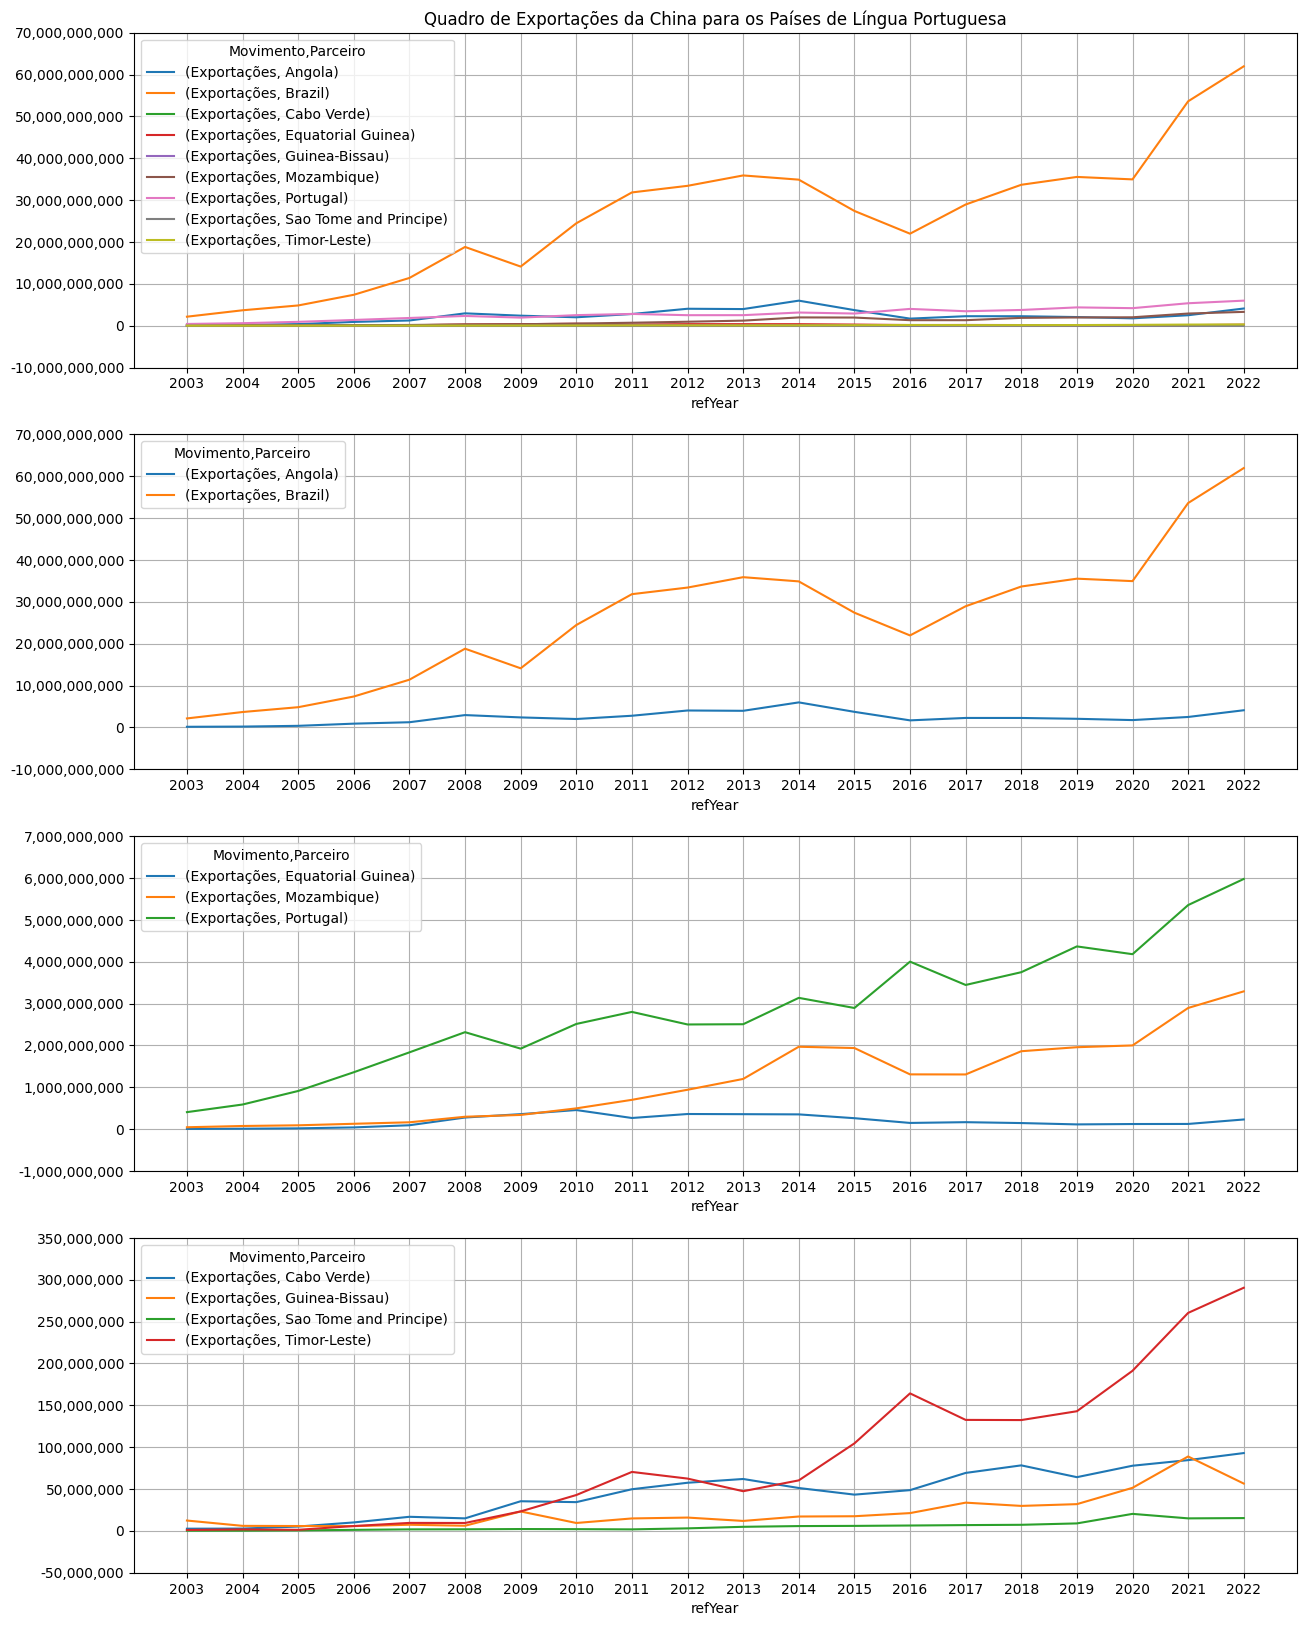

In [26]:
title=f"Quadro de {movimento} da {comtrade.COUNTRY_CODES[comtrade.m49_china]} para os Países de Língua Portuguesa"

size=(15,20)
figure,axis = plt.subplots(4,sharex=False,figsize=size, squeeze=True)
graph_data.plot.line(ax=axis[0],xticks=graph_data.index.values,title=title)

detalhe_paises = ['Angola','Brazil']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[1],xticks=graph_data.index.values)

detalhe_paises = ['Equatorial Guinea','Mozambique','Portugal',]
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[2],xticks=graph_data.index.values)

detalhe_paises = ['Cabo Verde','Guinea-Bissau','Sao Tome and Principe','Timor-Leste']
cols = [(movimento, pais) for pais in detalhe_paises]
graph_data[cols].plot.line(ax=axis[3],xticks=graph_data.index.values)

for ax in axis:
    current_values = ax.get_yticks()
    ax.set_yticks(current_values)
    ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
    ax.grid()

plt.savefig(f"reports/cn_plp_{movimento}.png")

### Gráficos saldo (China: exportações-importações)

In [27]:
pd.options.display.float_format = '{:,.2f}'.format
movimento = 'Saldo' # Trocas, Importações, Exportações
graph_data = forum_type.reset_index().pivot(index='refYear',columns=['partnerDesc'], values=[movimento])
graph_data.columns.set_names(['Movimento','Parceiro'], inplace=True)
graph_data

Movimento              Saldo                                   \
Parceiro              Angola             Brazil    Cabo Verde   
refYear                                                         
2003       -2,060,143,665.00  -3,699,035,774.00  2,595,744.00   
2004       -4,523,821,241.00  -4,998,757,110.00           NaN   
2005       -6,209,034,768.00  -5,165,314,721.00           NaN   
2006      -10,039,109,474.00  -5,529,389,430.00 10,093,746.00   
2007      -11,654,145,952.00  -6,943,598,580.00 16,826,438.00   
2008      -19,440,054,073.00 -11,055,985,339.00           NaN   
2009      -12,289,870,694.00 -14,162,464,249.00 35,404,839.00   
2010      -20,811,176,878.00 -13,638,795,485.00 34,323,033.00   
2011      -22,138,027,126.00 -20,550,072,955.00 49,739,623.00   
2012      -29,522,725,647.00 -18,867,493,429.00 57,489,358.00   
2013      -28,008,610,414.00 -18,403,651,409.00 61,995,934.00   
2014      -25,131,018,227.00 -16,763,090,404.00 51,220,417.00   
2015      -12,284,465,500.00 -16,677,132,636.00 43,277,589.00   
2016      -12,285,718,456.00 -23,878,894,481.00 48,588,157.00   
2017      -18,441,256,242.00 -29,906,617,038.00 69,231,860.00   
2018      -23,573,373,248.00 -43,904,360,798.00 77,975,354.00   
2019      -21,781,674,725.00 -44,423,483,135.00 64,138,300.00   
2020      -13,009,638,134.00 -50,563,981,695.00 76,626,687.00   
2021      -18,416,685,636.00 -56,265,651,888.00 83,390,817.00   
2022      -19,149,075,976.00 -47,552,072,745.00 92,944,146.00   

Movimento                                                                     \
Parceiro  Equatorial Guinea  Guinea-Bissau       Mozambique         Portugal   
refYear                                                                        
2003        -406,838,510.00            NaN    18,436,521.00   211,642,721.00   
2004        -986,525,186.00   5,965,053.00    30,868,208.00   307,362,629.00   
2005      -1,419,032,543.00            NaN    17,950,550.00   588,118,240.00   
2006      -2,496,483,676.00   5,676,992.00    48,168,135.00 1,005,855,077.00   
2007      -1,604,492,544.00   7,135,829.00    39,304,871.00 1,450,109,864.00   
2008      -1,990,480,978.00   4,904,436.00   170,112,575.00 1,929,612,429.00   
2009        -696,647,653.00  21,576,461.00   161,579,441.00 1,442,586,354.00   
2010        -142,415,784.00   5,570,830.00   295,313,507.00 1,758,891,674.00   
2011      -1,406,630,326.00  10,738,246.00   443,005,827.00 1,639,369,807.00   
2012      -1,461,369,179.00   9,261,189.00   537,566,555.00   986,575,553.00   
2013      -2,112,400,709.00  -4,938,168.00   744,418,497.00 1,107,402,918.00   
2014      -2,864,674,920.00 -32,803,053.00   318,917,431.00 1,473,781,736.00   
2015        -905,106,545.00    -329,751.00 1,485,407,308.00 1,433,380,120.00   
2016        -483,597,675.00  21,075,233.00   829,200,926.00 2,419,301,438.00   
2017      -1,317,617,070.00  33,321,971.00   778,030,916.00 1,306,036,420.00   
2018      -1,994,225,695.00  22,193,023.00 1,228,247,462.00 1,501,142,558.00   
2019      -1,609,859,606.00  23,536,318.00 1,244,453,438.00 2,044,123,682.00   
2020      -1,060,429,009.00  51,425,255.00 1,420,569,933.00 1,408,076,719.00   
2021      -1,091,158,371.00  88,877,803.00 1,754,478,509.00 1,900,447,703.00   
2022      -1,285,656,216.00  56,513,335.00 1,952,008,337.00 2,942,013,790.00   

Movimento                                       
Parceiro  Sao Tome and Principe    Timor-Leste  
refYear                                         
2003                 169,993.00   1,066,991.00  
2004              -1,114,761.00   1,708,456.00  
2005                        NaN   1,272,109.00  
2006                        NaN  -5,169,855.00  
2007                        NaN   9,470,273.00  
2008               1,870,603.00   9,320,198.00  
2009               2,193,646.00  23,237,475.00  
2010               2,043,892.00  42,581,521.00  
2011               1,790,531.00  68,689,971.00  
2012               2,964,586.00  61,785,364.00  
2013               4,859,5

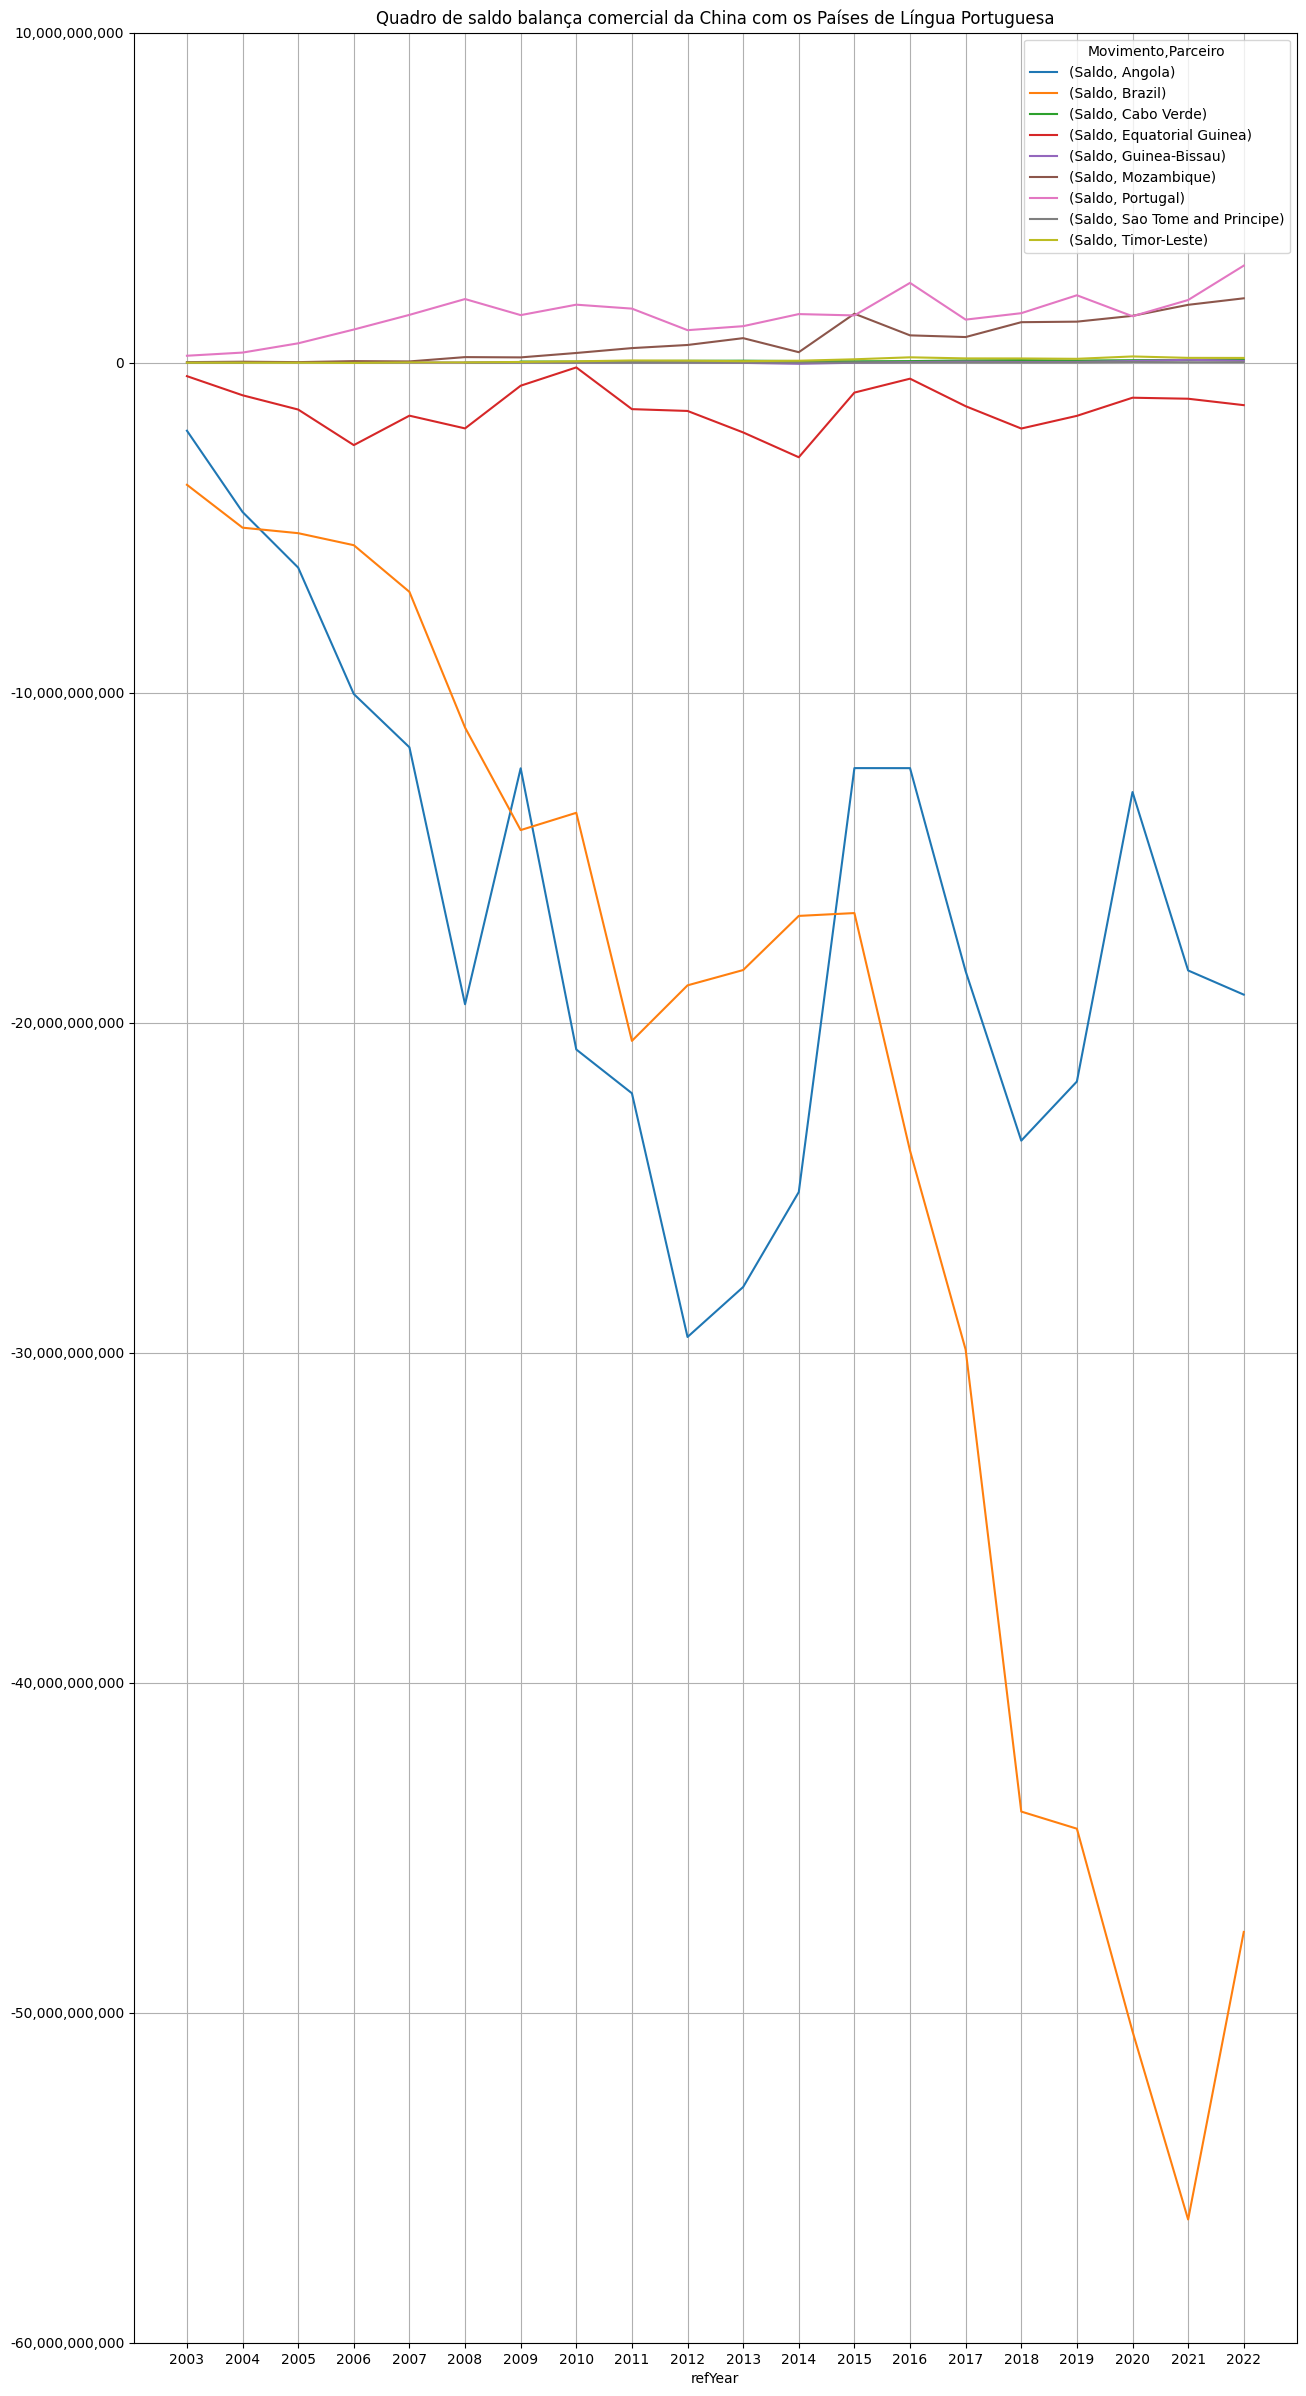

In [28]:
import matplotlib.pyplot as plt

title=f"Quadro de saldo balança comercial da {comtrade.COUNTRY_CODES[comtrade.m49_china]} com os Países de Língua Portuguesa"
ax = graph_data.plot.line(figsize=(15,30),xticks=graph_data.index.values,title=title)

current_values = ax.get_yticks()
ax.set_yticks(current_values)
ax.set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
ax.grid()
plt.savefig(f"downloads/cn_plp_{movimento}.png")

In [29]:
import datetime
# print the current date and time


print("Current date and time: ", datetime.datetime.now())

Current date and time:  2023-09-12 03:21:48.372409
